<a href="https://colab.research.google.com/github/pyqt555/cudaFieldLines/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import numba 
import math
import time
import cv2 as cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb as rgb
import os
from google.colab.patches import cv2_imshow
from joblib import Parallel, delayed
from multiprocessing.dummy import Pool as ThreadPool
import itertools

charge=[x,y,c]

In [4]:
X=0
Y=1
C=2
TIMESCALE=10
E0=1

In [3]:
def compute_force(c1,c2):

    c_dir=c1[C]*c2[C]
    dist=np.sqrt(np.square(c1[X]-c2[X])+np.square(c1[Y]-c2[Y]))
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*np.square(dist)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec


In [ ]:
%timeit compute_force([1,0,1],[-1,0,1])

9.02 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


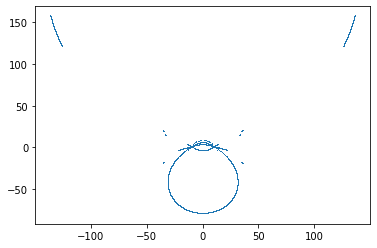

array([[-1.13882007e-02,  5.00000000e+00, -1.00000000e+00],
       [-2.27764191e-02,  4.99998444e+00, -1.00000000e+00],
       [-3.41647120e-02,  4.99995331e+00, -1.00000000e+00],
       ...,
       [ 1.36228890e+02,  1.57466476e+02, -1.00000000e+02],
       [-1.00000000e+01,  0.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+01,  0.00000000e+00,  1.00000000e+00]])

In [4]:
lst=[]
testcharge=[0,5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## underside
testcharge=[0,-5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-80,100]
for i in range(121400):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-80,-100]
for i in range(121400):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## plot

lst.append([-10,0,-1])
lst.append([10,0,1])
lst=np.array(lst)
plt.plot(lst[:,0], lst[:,1],",")
plt.show()
lst

Numba Implementation(slow and wrong)

In [5]:

@numba.vectorize(["float64(float64,float64,float64,float64,float64,float64)"])
def compute_forces(c1,c2,x1,x2,y1,y2):
    c_dir=c1*c2
    dist=(((x1-x2)**2)+((y1-y2)**2))**.5
    dir_vec=[x1-x2,y1-y2]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec[0]

In [ ]:
compute_forces.ufunc.types

['dddddd->d']

In [ ]:
test=np.random.random((6,100000))


%timeit compute_forces(*test)

30.4 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numba (fast)

In [5]:
from numba import float64
@numba.guvectorize([(float64[:],float64[:],float64[:])], '(n),(n)->(n)',target="parallel")
def compute_force_guv(c1,c2,res):
    c_dir=c1[C]*c2[C]
    dist=((c1[X]-c2[X])**2+(c1[Y]-c2[Y])**2)**.5
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir*(-1)#-1 for correct direction
    res[:]=[norm_vec[X]*return_const,norm_vec[Y]*return_const,0]
    
    #print(res)

In [ ]:
test=np.random.random((3,2,100))



%timeit compute_force_guv(*test)

ValueError: ignored

In [4]:
compute_force_guv.ufunc.signature

AttributeError: ignored

In [6]:
test2=np.array([[[1,1,1],[2,2,2]]],dtype="float64")
res=np.zeros((2,3))
@numba.jit
def compute_vectors_guv_fixed_output(non_statics,statics):
    f=compute_force_guv(non_statics,statics,np.zeros((statics.shape[0],3)))[:,:2]
    return np.array([np.sum(f[:,0]),np.sum(f[:,1])])



In [ ]:
%prun compute_vectors_guv_fixed_output(np.array([[0,0,1]]),np.random.random((200000,3)))

In [ ]:

%timeit compute_vectors_guv_fixed_output(np.random.random((10000,3)),np.random.random((10000,3)))

In [19]:
#@numba.jit
def compute_line(testcharge,line_length,statics):
  #print("new Charge")
  positions=[]
  for i in range(int(line_length)):
        #if i%100==0:
        #  print(i)
        testcharge_dir=compute_vectors_guv_fixed_output([testcharge],statics)
        
        testcharge=[testcharge[X]+testcharge_dir[X],testcharge[Y]+testcharge_dir[Y],testcharge[C]]
        
        if (testcharge_dir[X]**2+testcharge_dir[Y]**2) >(1*TIMESCALE)**2:
          #print(i)
          #print(np.sum(testcharge_dir**2))
          break
   
        positions.append(testcharge)
  #print("computed")
  return positions

def compute_lines(statics,nonstatics,line_length=1000):
    nonstatics=nonstatics.copy()
    positions=[]
    pool = ThreadPool(int((nonstatics.shape[0]/2)+0.999))
    print(nonstatics.shape[0])
    results = pool.starmap(compute_line, zip(nonstatics,itertools.repeat(line_length),itertools.repeat(statics)))
    pool.close()
    pool.join()
    #results=compute_line(nonstatics[0],line_length,statics)
    return np.array(results)
        



In [ ]:
pip install line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext line_profiler

Random tests

In [43]:
#statics=np.random.random((2000,3))*3.145926
statics=np.array([[-10,0,-1],[10,0,1]])#*4
Nonstatics=np.ones((20,3))
Nonstatics[0:10,1]=range(10)
Nonstatics[10:20,1]=range(10)
Nonstatics[:,1]+=.5
Nonstatics[:,0]=-11
Nonstatics[10:20,2]=-5
Nonstatics[0:10,2]=5
Nonstatics[:,1]-=5
#statics=np.sin(statics)
TIMESCALE=100
lst= compute_lines(statics,Nonstatics,line_length=10000)



20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


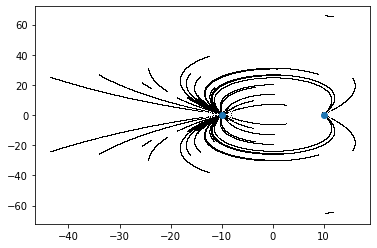

In [44]:
for line in lst:
  if len(line)>0: 
    nl=[]
    for p in line:
      nl.append((p[0],p[1]))
    nl=np.array(nl)
    plt.plot(nl[:,0], nl[:,1],",",color="black")  
plt.plot(statics[:,0], statics[:,1],"o")



plt.show()
#lst

Homogen Test

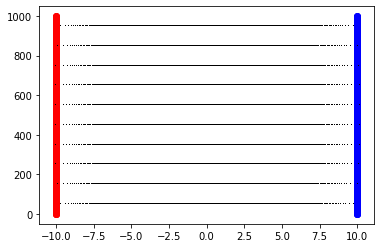

array([[ 3.15269826e-02,  5.00000000e+01,  1.00000000e+00],
       [ 6.30542819e-02,  5.00000004e+01,  1.00000000e+00],
       [ 9.45825311e-02,  5.00000011e+01,  1.00000000e+00],
       ...,
       [-9.19449748e+00,  9.49990812e+02, -1.00000000e+00],
       [-9.40769039e+00,  9.49991110e+02, -1.00000000e+00],
       [-9.71978724e+00,  9.49992826e+02, -1.00000000e+00]])

In [ ]:
Statics=np.ones((2000,3))
Statics[0:1000,0]=-10
Statics[1000:2000,0]=10
Statics[0:1000,2]=-1
Statics[0:1000,1]=range(1000)
Statics[1000:2000,1]=range(1000)
Nonstatics=np.ones((20,3))
Nonstatics[0:10,1]=range(10)
Nonstatics[10:20,1]=range(10)
Nonstatics[:,1]+=.5
Nonstatics[:,0]=0
Nonstatics[10:20,2]=-1
Nonstatics[:,1]*=100
Hfl=compute_lines(Statics,Nonstatics)
lst=np.array(Hfl)

plt.plot(Statics[0:1000,0], Statics[0:1000,1],"o" ,color=rgb((1.,1.,1.)))
plt.plot(Statics[1000:2000,0], Statics[1000:2000,1],"o" ,color=rgb((2/3,1.,1.)))
plt.plot(lst[:,0], lst[:,1],",",color="black")  


plt.show()
lst

Test imload

In [ ]:
os.listdir("sample_data")


['anscombe.json',
 'README.md',
 'test.bmp',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [8]:
testimg=cv2.imread("sample_data/test.bmp")

#cv2_imshow(testimg)
#testimg=cv2.cvtColor(testimg,cv2.COLOR_BGR2GRAY)

#cv2_imshow()
np.array(np.where(testimg!=255)).shape

(3, 230523)

In [ ]:
test_array= np.arange(180)
test_array+=75
test_array=test_array%180
test_array

array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74])

In [15]:
def extract_charges(img,val_img=None):
  img=cv2.cvtColor(img.copy(),cv2.COLOR_BGR2HSV)
  
  if type(val_img)!=type(None):
    valarray=cv2.cv2Color(val_img.copy(),cv2.COLOR_BGR2GRAY)/255
  else:
    valarray=np.ones(img[:,:,0].shape)
   
  bluemask=cv2.inRange(img, (80,125,125), (130,255,255))
  redmaskimg=img
  redmaskimg[:,:,0]+=75
  redmaskimg[:,:,0]=redmaskimg[:,:,0]%180
  redmask=cv2.inRange(redmaskimg,(65,125,125),(85,255,255))
  #cv2_imshow(redmask)
  #cv2_imshow(bluemask)
  #pos_charge_img=redmask*valarray
  #neg_charge_img=redmask*valarray*(-1)
  charges=[]
  neg_c=np.array(np.where(bluemask!=0))
  for i in range(neg_c.shape[1]):
    coords=neg_c[:,i]
    charges.append([coords[1],bluemask.shape[0]-coords[0]-1,valarray[coords[0],coords[1]]*-1])
  pos_c=np.array(np.where(redmask!=0))
  for i in range(neg_c.shape[1]):
    coords=pos_c[:,i]
    charges.append([coords[1],bluemask.shape[0]-coords[0]-1,valarray[coords[0],coords[1]]])
  return np.array(charges)
  
#%lprun -f extract_charges extract_charges(testimg)

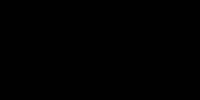

In [ ]:
testimgarray=np.ones((100,200))
cv2_imshow(testimgarray)

In [10]:
def distribute_line_charges(img,res_x,res_y=None):
  if type(res_y)==type(None):
    res_y=res_x
  
  x_coords=((np.arange(res_x)+.5)/res_x)*img.shape[1]
  y_coords=((np.arange(res_y)+.5)/res_y)*img.shape[0]
  lines=np.array(np.meshgrid(x_coords,y_coords,(-1,1))).T.reshape(-1,3)
  return lines
#%lprun -f distribute_line_charges distribute_line_charges(testimg,10)


200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


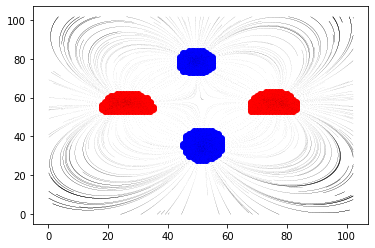

In [81]:
def display_lines_from_img(img,res_x,res_y=None,sim_scale=100,val_img=None,line_length=1000,Timescale=1,Linemode=True,markersize=.1,linewidth=.2,marker=","):
  TIMESCALE=Timescale


  scale_percent = 60 # percent of original size
  width = int(img.shape[1] * sim_scale / 100)
  height = int(img.shape[0] * sim_scale / 100)
  dim = (width, height)
  img = cv2.resize(img.copy(), dim, interpolation = cv2.INTER_AREA)

  stationary_charges=extract_charges(img.copy(),val_img)
  line_charges=distribute_line_charges(img.copy(),res_x,res_y)
  lines=np.array(compute_lines(stationary_charges,line_charges,line_length))
  neg,pos=np.split(stationary_charges,2)
  plt.plot(pos[:,0], pos[:,1],"o" ,color=rgb((1.,1.,1.)))
  plt.plot(neg[:,0], neg[:,1],"o" ,color=rgb((2/3,1.,1.)))
  #print(lines)
  #lines=lines.flatten()#lines.reshape((int(len(lines.flatten())/3),3))
  for line in lines:
    if len(line)>0:
      nl=[]
      for el in line:
        if not (el[0]>img.shape[0]or el[1]>img.shape[1]or el[0]<0 or el[1]<0):
          nl.append([el[0],el[1]])
      nl=np.array(nl)
      #print(nl)
      if Linemode:
        plt.plot(nl[:,0], nl[:,1],color="black",linestyle='-', linewidth=linewidth)
      else:  
        plt.plot(nl[:,0], nl[:,1],marker,color="black",markersize=markersize)

  plt.show()

display_lines_from_img(testimg,10,line_length=1000,sim_scale=10,Timescale=.1,Linemode=False,marker="o",markersize=.01)



NameError: ignored